In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
(train_X,train_y), (test_X, test_y)= mnist.load_data()

In [3]:
train_X.shape,train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

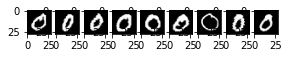

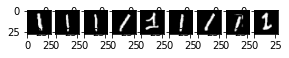

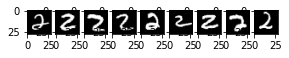

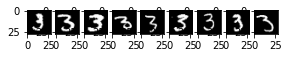

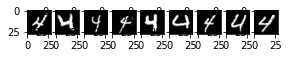

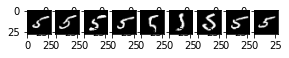

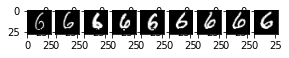

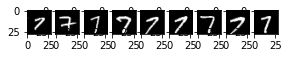

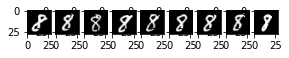

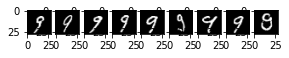

In [4]:
for i in range(10):
    idx=np.where(train_y==i)
    sample_x=train_X[idx]
    plt.figure(figsize=[5,5])
    for x in range(1,10):
        ax=plt.subplot(1,10, x)
        ax.imshow(sample_x[x], cmap='gray')

In [5]:
from tensorflow.keras.utils import to_categorical
train_y_enc ,test_y_enc=to_categorical(train_y),to_categorical(test_y)

In [6]:
train_y_enc.shape ,test_y_enc.shape

((60000, 10), (10000, 10))

In [7]:
train_X.shape, train_X.shape

((60000, 28, 28), (60000, 28, 28))

In [8]:
train_X, train_X= train_X.reshape(-1,28,28,1), train_X.reshape(-1,28,28,1)

In [9]:
from keras.models import Sequential
from keras.layers import  Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD

In [25]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax' ))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics='accuracy')

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

In [13]:
history=model.fit(train_X,train_y_enc,validation_data=(test_X,test_y_enc), epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 89s 47ms/step - loss: 1.2904 - accuracy: 0.6188 - val_loss: 0.1749 - val_accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.2853 - accuracy: 0.9132 - val_loss: 0.1254 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2106 - accuracy: 0.9345 - val_loss: 0.1001 - val_accuracy: 0.9710
Epoch 4/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1700 - accuracy: 0.9491 - val_loss: 0.0832 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1516 - accuracy: 0.9542 - val_loss: 0.0825 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1336 - accuracy: 0.9590 - val_loss: 0.0758 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1234 - accuracy: 0.9618 - val_loss: 0.0682 -